In [1]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMG_W = 32
IMG_H = 32

In [3]:
# Load image data
(trainX, trainY), (testX, testY) = mnist.load_data()
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
train_indices = np.argwhere(trainY < 2)
test_indices = np.argwhere(testY < 2)
train_indices = np.squeeze(train_indices)
test_indices = np.squeeze(test_indices)

In [5]:
trainX = trainX[train_indices]
trainY = trainY[train_indices]
testX = testX[test_indices]
testY = testY[test_indices]
trainX = np.pad(trainX, ((0,0),(2,2),(2,2)), 'constant')
testX = np.pad(testX, ((0,0),(2,2),(2,2)), 'constant')

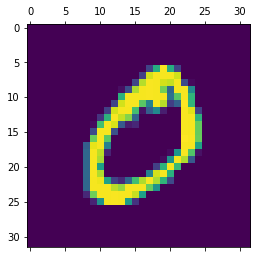

In [6]:
plt.matshow(trainX[0])

In [7]:
trainX = np.stack((trainX,)*3, axis=-1)
testX = np.stack((testX,)*3, axis=-1)

In [8]:
classN = 2
trainY = to_categorical(trainY, classN)
testY = to_categorical(testY, classN)

In [9]:
# To convert pixel values from 0-255 into 0-1.    
trainX = trainX.astype(np.float32)
testX = testX.astype(np.float32)
trainX /= 255
testX /= 255 

In [10]:
# Preprocess image data to be fit with VGG16
testX = preprocess_input(testX)
trainX = preprocess_input(trainX)

In [11]:
baseModel = VGG16(input_shape = (IMG_W, IMG_H, 3), include_top = False)
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [12]:
for layer in baseModel.layers:
        layer.trainable = False
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [13]:
inputs = baseModel.input
x = baseModel.output
x = Flatten()(x)
x = Dense(8, activation = 'sigmoid')(x)
outputs = Dense(2)(x)

In [14]:
model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model.compile(loss = 'mse', optimizer='rmsprop')
model.fit(trainX, trainY, epochs = 50, batch_size = 32, validation_split = 0.2)
model.compile(metrics = 'accuracy')

In [15]:
model.evaluate(testX, testY)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.